In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [128]:
dataset = pd.read_csv('D:\\uni\\2курс\Аналіз_даних\DataAnalysis_code\lab4\groceries - groceries.csv')
dataset.head(15)

<>:1: DeprecationWarning: invalid escape sequence '\D'
<>:1: DeprecationWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_26264\1787650419.py:1: DeprecationWarning: invalid escape sequence '\D'
  dataset = pd.read_csv('D:\\uni\\2курс\Аналіз_даних\DataAnalysis_code\lab4\groceries - groceries.csv')


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
dataset.columns

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')

In [130]:
dataset = dataset.drop(columns=['Item(s)'])
dataset.head(15)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
transactions = dataset.values.astype(str).tolist()
transactions = [[item for item in row if item != 'nan'] for row in transactions]
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [132]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [133]:
df.head(15)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [134]:
df.shape

(9835, 169)

In [135]:
apr_itemset = apriori(df, min_support=0.01, use_colnames=True)

In [136]:
print(apr_itemset.count()['itemsets'])

333


In [137]:
apr_itemset.head(15)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
5,0.080529,(bottled beer)
6,0.110524,(bottled water)
7,0.064870,(brown bread)
8,0.055414,(butter)
9,0.027961,(butter milk)


Confidence

In [138]:
rules = association_rules(apr_itemset, metric="confidence", min_threshold=0.40)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [139]:
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].sort_values(by=['confidence'], ascending=False).head(15)

,antecedents,consequents,support,confidence,lift,conviction
28,"(root vegetables, citrus fruit)",(other vegetables),0.010371,0.586207,3.029608,1.949059
43,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999,1.941244
32,"(curd, yogurt)",(whole milk),0.010066,0.582353,2.279125,1.782567
26,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885,1.745992
58,"(root vegetables, tropical fruit)",(whole milk),0.011998,0.570048,2.230969,1.731553
59,"(root vegetables, yogurt)",(whole milk),0.014540,0.562992,2.203354,1.703594
33,"(domestic eggs, other vegetables)",(whole milk),0.012303,0.552511,2.162336,1.663694
61,"(whipped/sour cream, yogurt)",(whole milk),0.010880,0.524510,2.052747,1.565719
55,"(rolls/buns, root vegetables)",(whole milk),0.012710,0.523013,2.046888,1.560804
37,"(pip fruit, other vegetables)",(whole milk),0.013523,0.517510,2.025351,1.543003


In [140]:
rules_plot_conf = []
for conf in np.linspace(0,1,20):
    rules = association_rules(apr_itemset, metric="confidence", min_threshold=conf)
    rules_plot_conf.append(len(rules))

Text(0, 0.5, 'nr of rules')

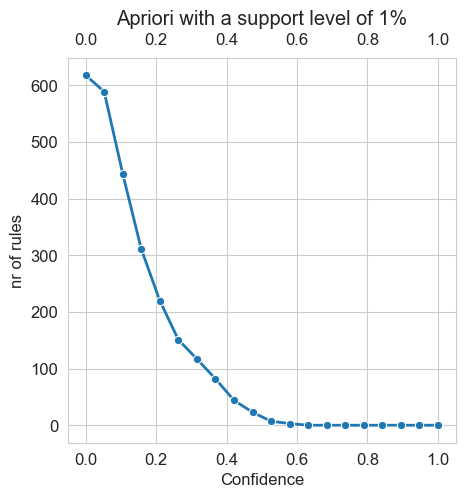

In [141]:
plt.rcParams['figure.figsize']=5,5
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_conf,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Confidence')
plt.ylabel('nr of rules')

Lift

In [142]:
rules = association_rules(apr_itemset, metric ="lift", min_threshold = 1)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [143]:
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].sort_values(by=['lift'], ascending=False).head(15)

,antecedents,consequents,support,confidence,lift,conviction
439,(curd),"(yogurt, whole milk)",0.010066,0.188931,3.372304,1.163866
438,"(yogurt, whole milk)",(curd),0.010066,0.179673,3.372304,1.154078
420,"(other vegetables, citrus fruit)",(root vegetables),0.010371,0.359155,3.295045,1.390354
421,(root vegetables),"(other vegetables, citrus fruit)",0.010371,0.095149,3.295045,1.073242
540,"(yogurt, other vegetables)",(whipped/sour cream),0.010168,0.234192,3.267062,1.212206
541,(whipped/sour cream),"(yogurt, other vegetables)",0.010168,0.141844,3.267062,1.114697
492,"(tropical fruit, other vegetables)",(root vegetables),0.012303,0.342776,3.144780,1.355705
493,(root vegetables),"(tropical fruit, other vegetables)",0.012303,0.112873,3.144780,1.086776
5,(beef),(root vegetables),0.017387,0.331395,3.040367,1.332628
4,(root vegetables),(beef),0.017387,0.159515,3.040367,1.127366


In [144]:
rules_plot_lift = []
for lift in np.linspace(0,4,20):
    rules = association_rules(apr_itemset, metric="lift", min_threshold=lift)
    rules_plot_lift.append(len(rules))

Text(0, 0.5, 'nr of rules')

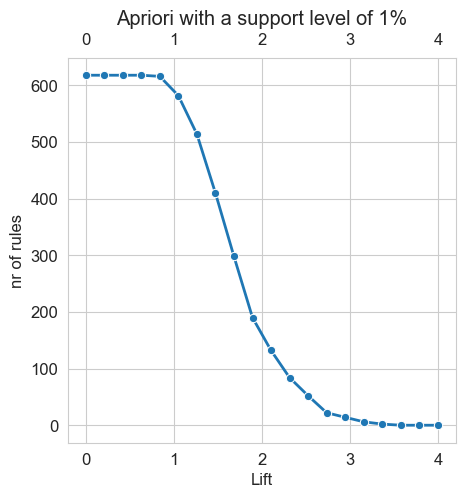

In [145]:
plt.rcParams['figure.figsize']=5,5
sns.set_style('whitegrid')
sns.lineplot(x=np.linspace(0,4,20),
             y=rules_plot_lift,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Lift')
plt.ylabel('nr of rules')

Support

In [146]:
rules = association_rules(apr_itemset, metric ="support", min_threshold = 0.01)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [147]:
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].sort_values(by=['support'], ascending=False).head(15)

,antecedents,consequents,support,confidence,lift,conviction
302,(other vegetables),(whole milk),0.074835,0.386758,1.513634,1.214013
303,(whole milk),(other vegetables),0.074835,0.292877,1.513634,1.140548
358,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,1.075696
359,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,1.048452
424,(yogurt),(whole milk),0.056024,0.401603,1.571735,1.244132
425,(whole milk),(yogurt),0.056024,0.219260,1.571735,1.102157
372,(root vegetables),(whole milk),0.048907,0.448694,1.756031,1.350401
373,(whole milk),(root vegetables),0.048907,0.191405,1.756031,1.101913
283,(other vegetables),(root vegetables),0.047382,0.244877,2.246605,1.179941
282,(root vegetables),(other vegetables),0.047382,0.434701,2.246605,1.426693


In [148]:
rules_plot_supp = []
for supp in np.linspace(0,1,20):
    rules = association_rules(apr_itemset, metric="support", min_threshold=supp)
    rules_plot_supp.append(len(rules))

Text(0, 0.5, 'nr of rules')

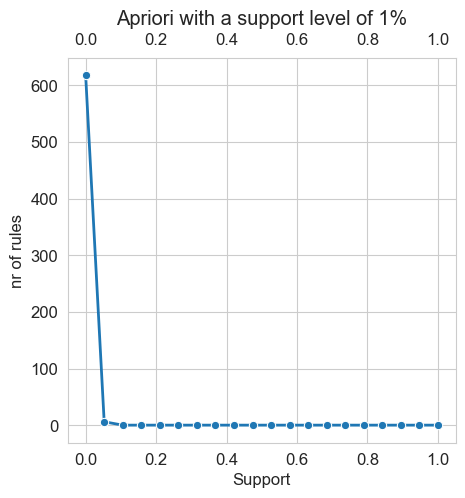

In [149]:
plt.rcParams['figure.figsize']=5,5
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_supp,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Support')
plt.ylabel('nr of rules')

Conviction

In [150]:
rules = association_rules(apr_itemset, metric ="conviction", min_threshold = 0.01)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [151]:
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].sort_values(by=['conviction'], ascending=False).head(15)

,antecedents,consequents,support,confidence,lift,conviction
438,"(root vegetables, citrus fruit)",(other vegetables),0.010371,0.586207,3.029608,1.949059
510,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999,1.941244
456,"(curd, yogurt)",(whole milk),0.010066,0.582353,2.279125,1.782567
432,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885,1.745992
588,"(root vegetables, tropical fruit)",(whole milk),0.011998,0.570048,2.230969,1.731553
594,"(root vegetables, yogurt)",(whole milk),0.014540,0.562992,2.203354,1.703594
463,"(domestic eggs, other vegetables)",(whole milk),0.012303,0.552511,2.162336,1.663694
492,"(rolls/buns, root vegetables)",(other vegetables),0.012201,0.502092,2.594890,1.619792
522,"(root vegetables, yogurt)",(other vegetables),0.012913,0.500000,2.584078,1.613015
558,"(whipped/sour cream, yogurt)",(other vegetables),0.010168,0.490196,2.533410,1.581995


In [152]:
rules_plot_conv = []
for conv in np.linspace(0,1,20):
    rules = association_rules(apr_itemset, metric="conviction", min_threshold=conv)
    rules_plot_conv.append(len(rules))

Text(0, 0.5, 'nr of rules')

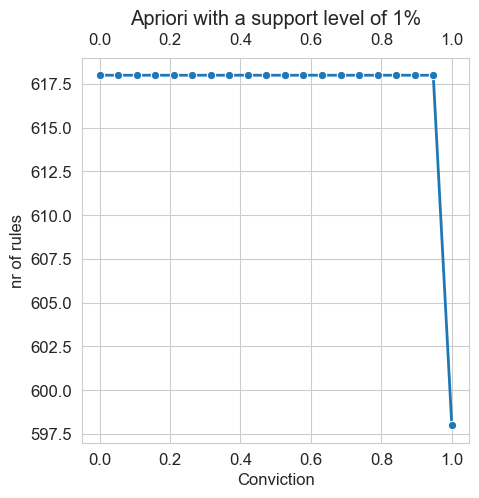

In [153]:
plt.rcParams['figure.figsize']=5,5
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_conv,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Conviction')
plt.ylabel('nr of rules')

Networks (confidence) (можна зробити для всіх метрик)

In [154]:
rules = association_rules(apr_itemset, metric ="confidence", min_threshold = 0.4)

In [155]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules['rule'] = rules.index
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction', 'rule']].sort_values(by=['confidence'], ascending=False).head(100)

,antecedents,consequents,support,confidence,lift,conviction,rule
28,"(root vegetables, citrus fruit)",(other vegetables),0.010371,0.586207,3.029608,1.949059,28
43,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999,1.941244,43
32,"(curd, yogurt)",(whole milk),0.010066,0.582353,2.279125,1.782567,32
26,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885,1.745992,26
58,"(root vegetables, tropical fruit)",(whole milk),0.011998,0.570048,2.230969,1.731553,58
...,...,...,...,...,...,...,...
49,"(tropical fruit, whole milk)",(other vegetables),0.017082,0.403846,2.087140,1.352851,49
21,(tropical fruit),(whole milk),0.042298,0.403101,1.577595,1.247252,21
17,(whipped/sour cream),(other vegetables),0.028876,0.402837,2.081924,1.350565,17
14,(oil),(whole milk),0.011286,0.402174,1.573968,1.245319,14


In [156]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
coords = rules[['antecedent','consequent','rule']][rules['antecedent_len']>1]

In [157]:
import networkx as nx
rules.sort_values(['confidence']).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequent_len,rule,antecedent,consequent
24,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432,1,1,24,['yogurt'],['whole milk']
14,(oil),(whole milk),0.028063,0.255516,0.011286,0.402174,1.573968,1.0,0.004116,1.245319,0.375192,0.041449,0.196993,0.223172,1,1,14,['oil'],['whole milk']
17,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,1.0,0.015006,1.350565,0.559803,0.122203,0.259569,0.276037,1,1,17,['whipped/sour cream'],['other vegetables']
21,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,1.0,0.015486,1.247252,0.409045,0.132950,0.198238,0.284320,1,1,21,['tropical fruit'],['whole milk']
49,"(tropical fruit, whole milk)",(other vegetables),0.042298,0.193493,0.017082,0.403846,2.087140,1.0,0.008898,1.352851,0.543880,0.078103,0.260820,0.246064,2,1,49,"['tropical fruit', 'whole milk']",['other vegetables']


In [158]:
G = nx.from_pandas_edgelist(rules,
                            source='antecedent',
                            target='consequent',
                            edge_attr='confidence'
                            )

C:\Users\User\scoop\apps\python310\current\lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


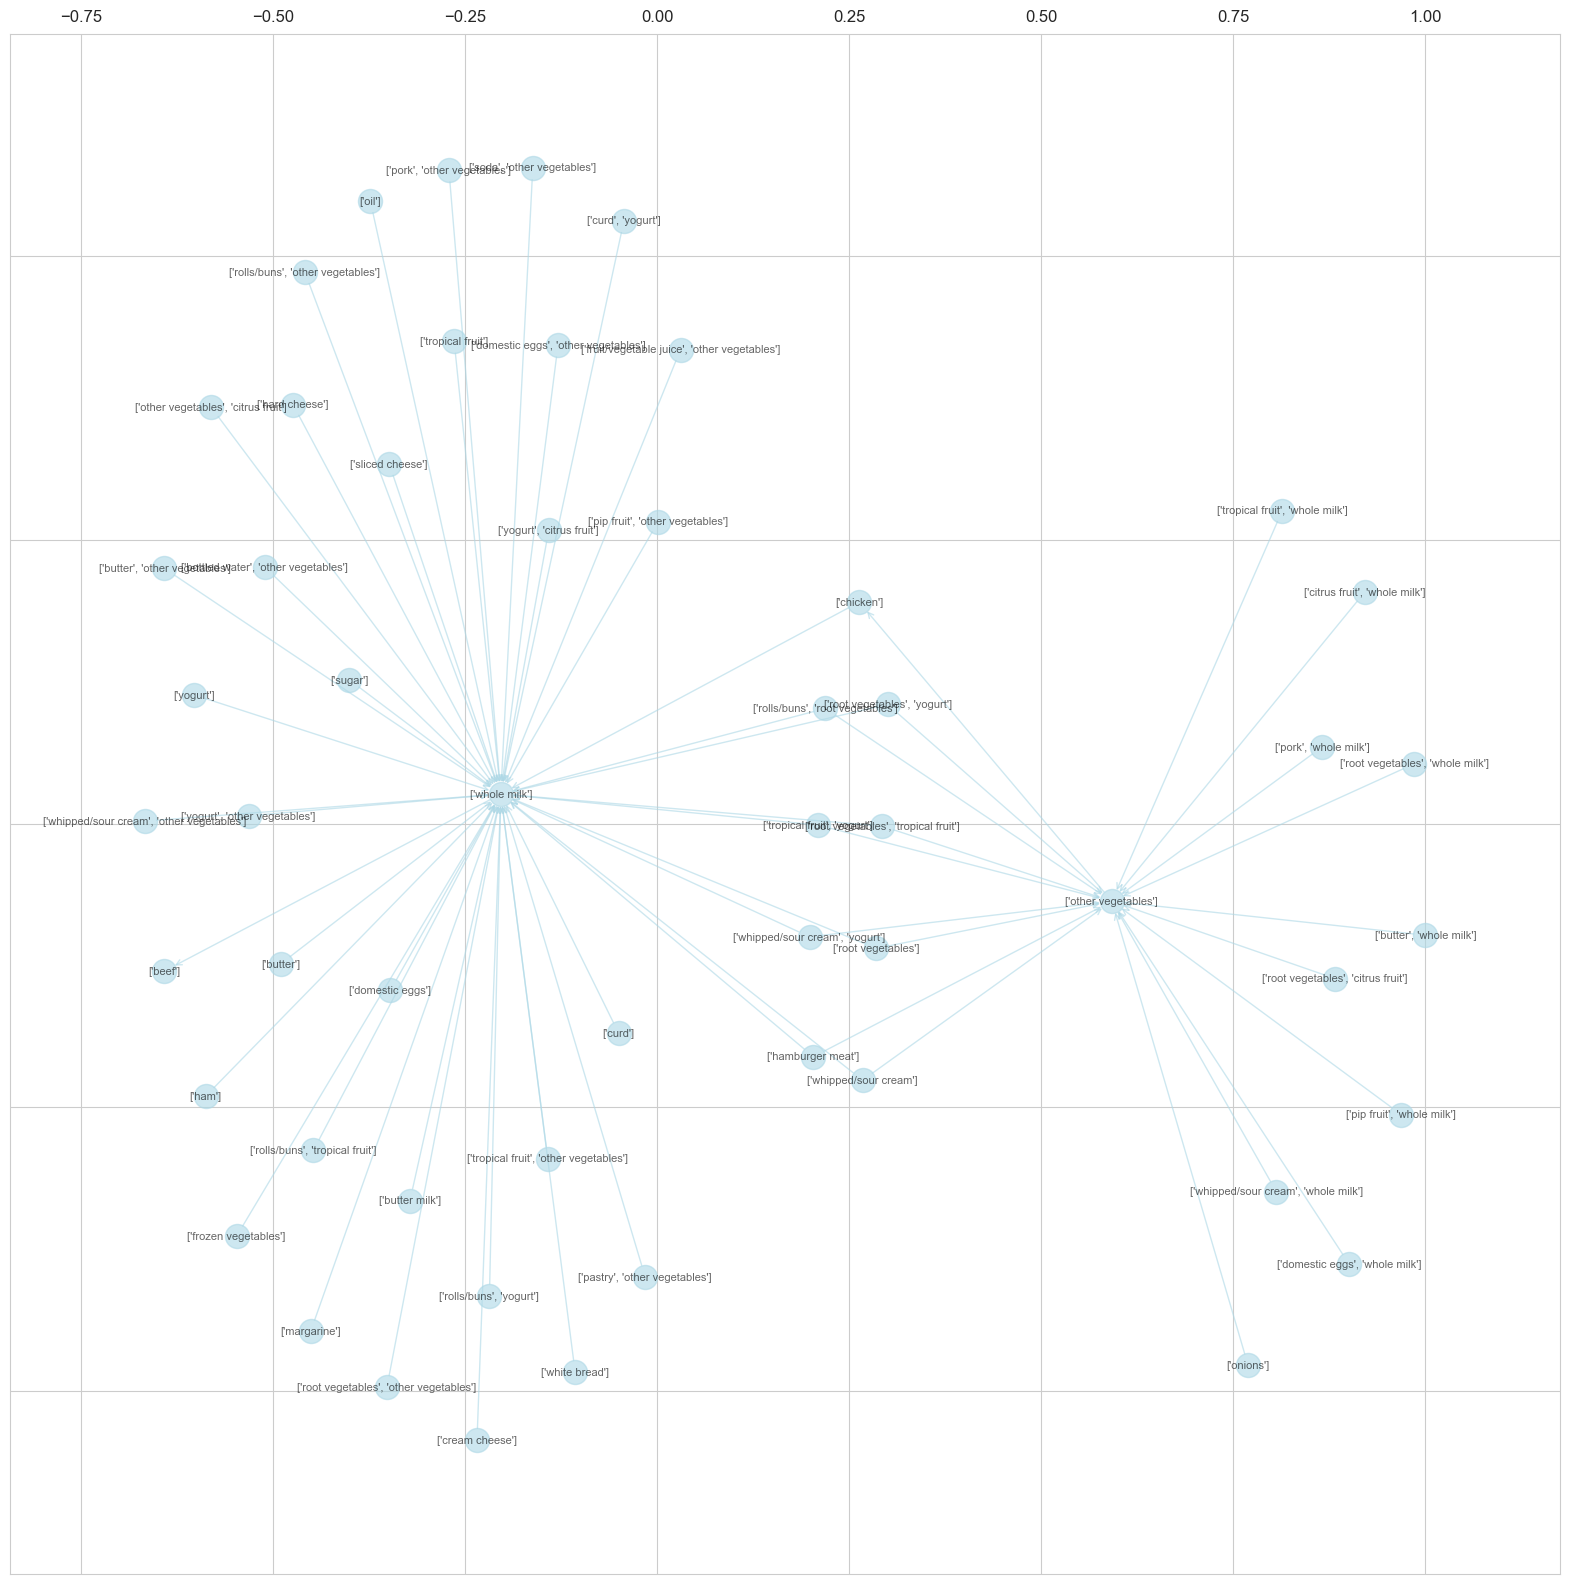

In [159]:
plt.rcParams['figure.figsize']=20,20
nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightblue',
                 font_size=8,
                 node_color='lightblue'
                 )

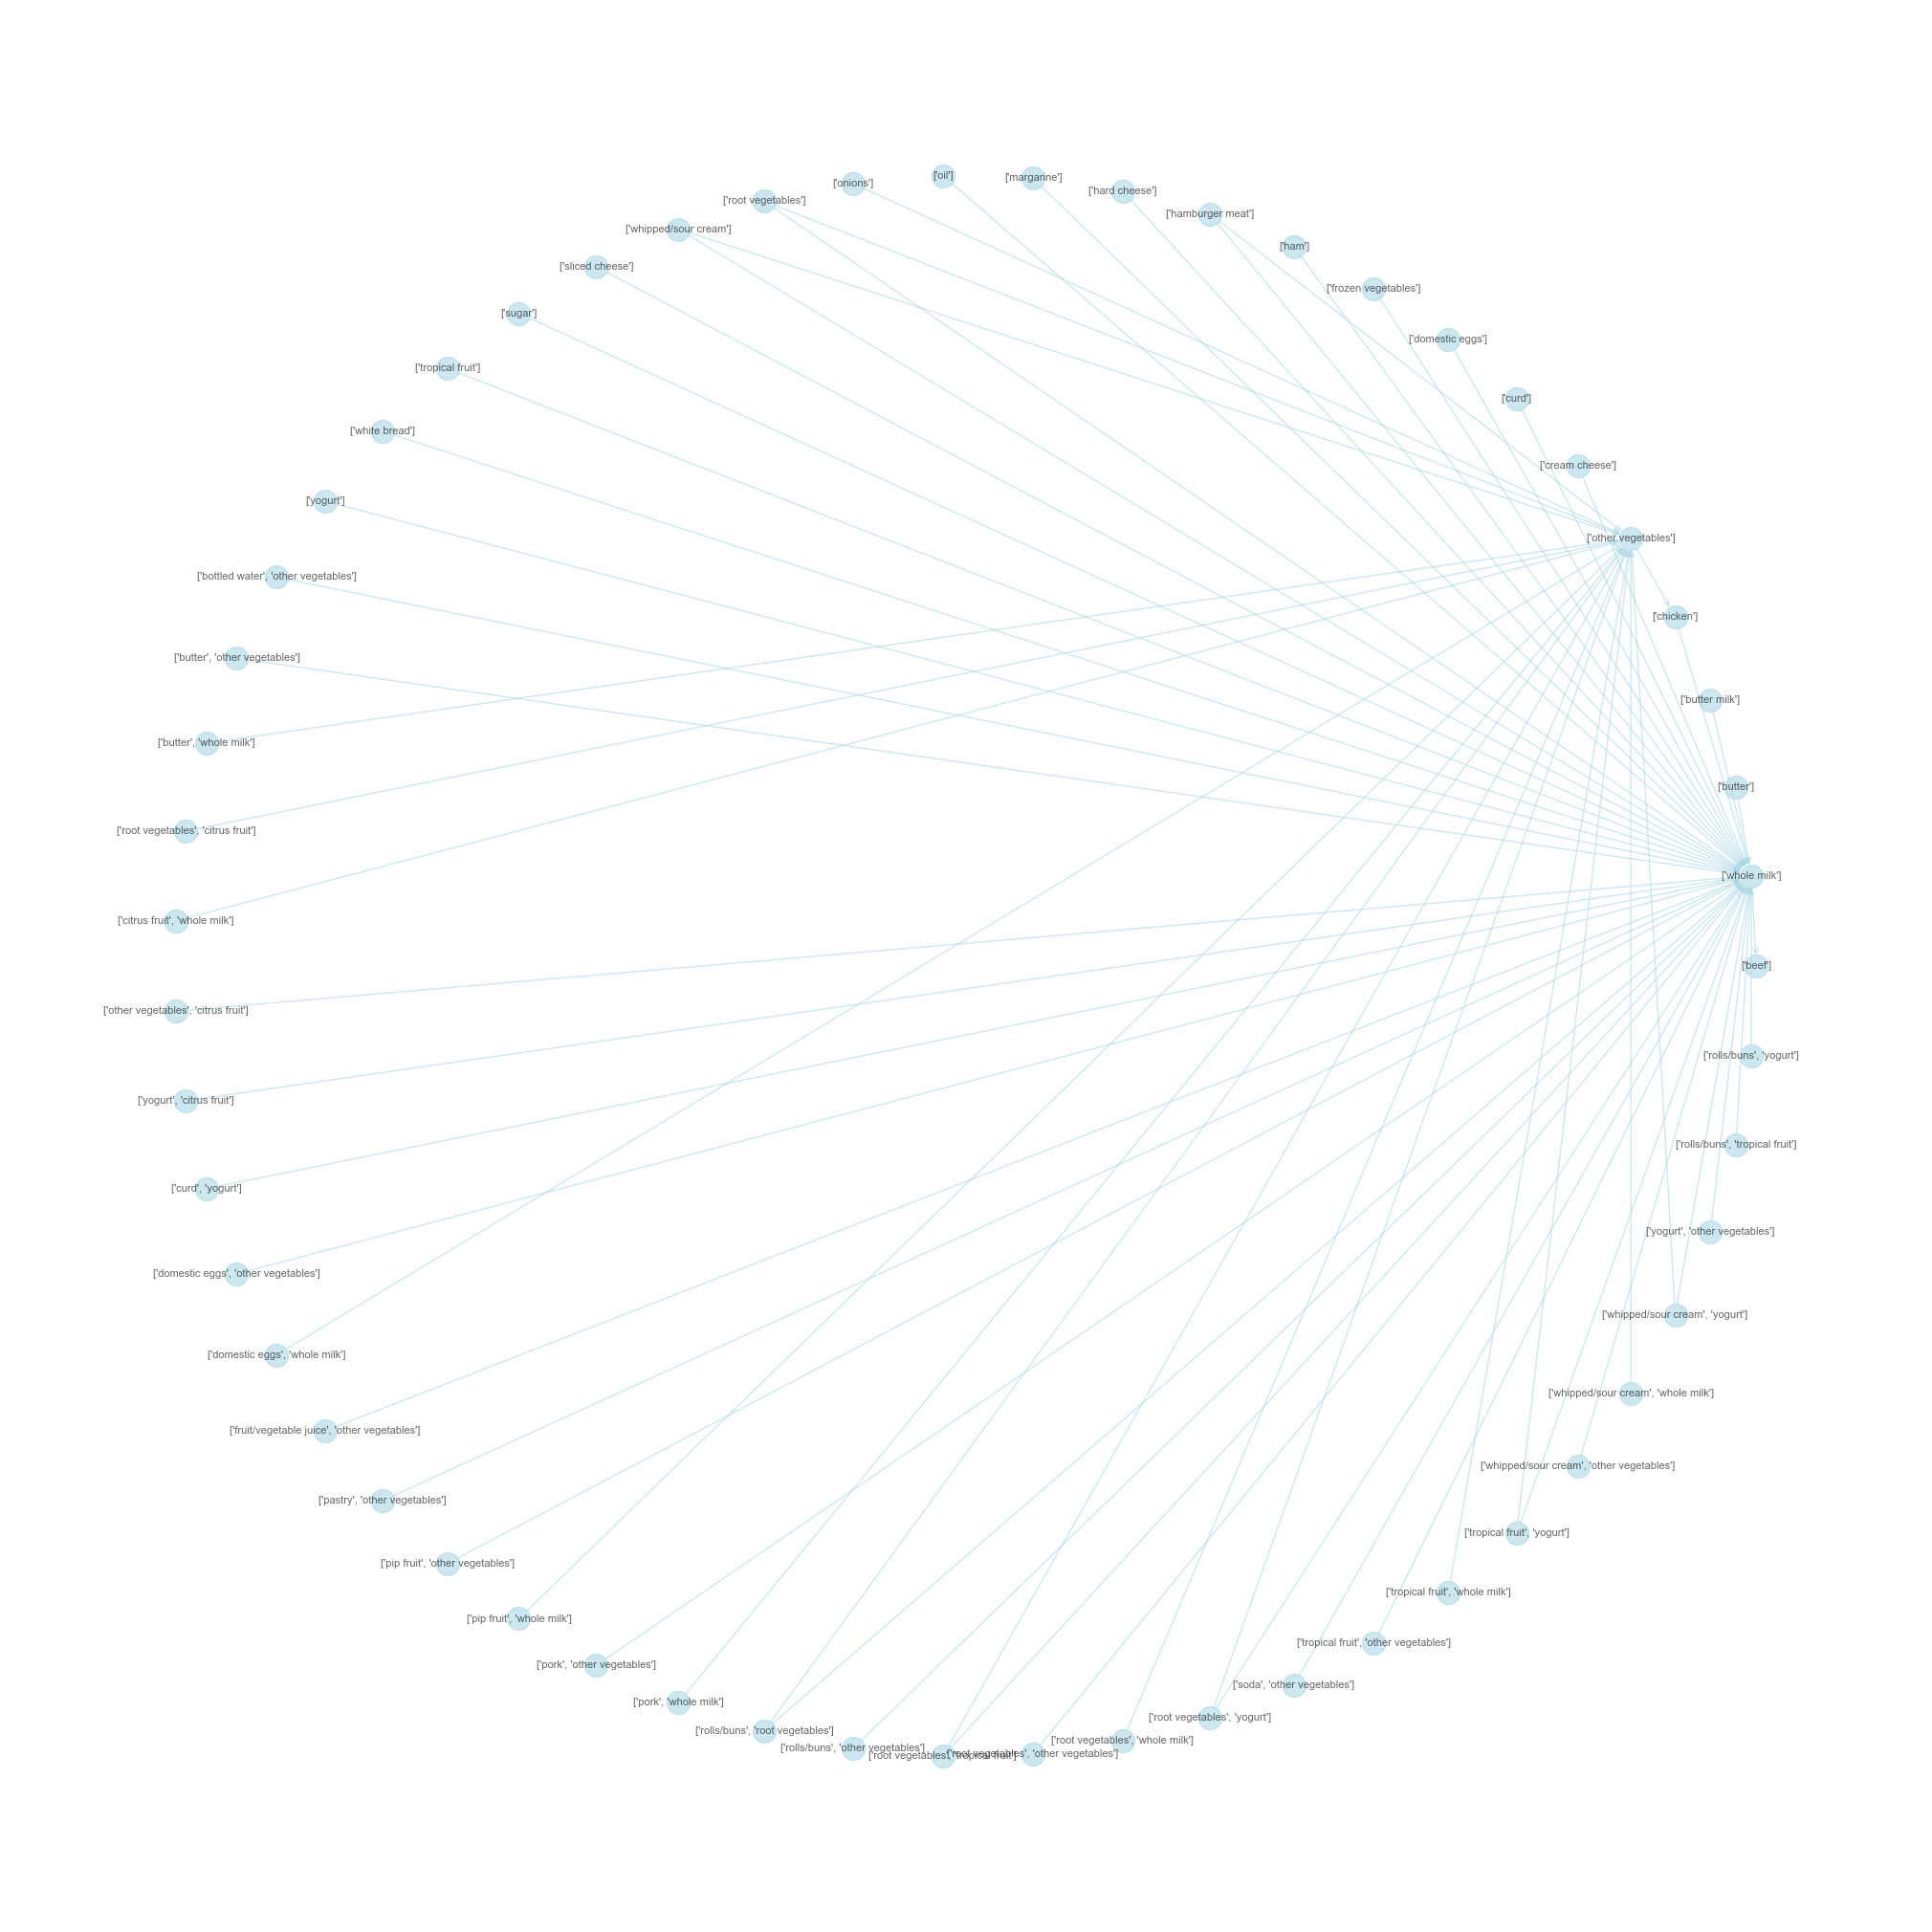

In [160]:
nx.draw_circular(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightblue',
                 font_size=8,
                 node_color='lightblue'
                 )